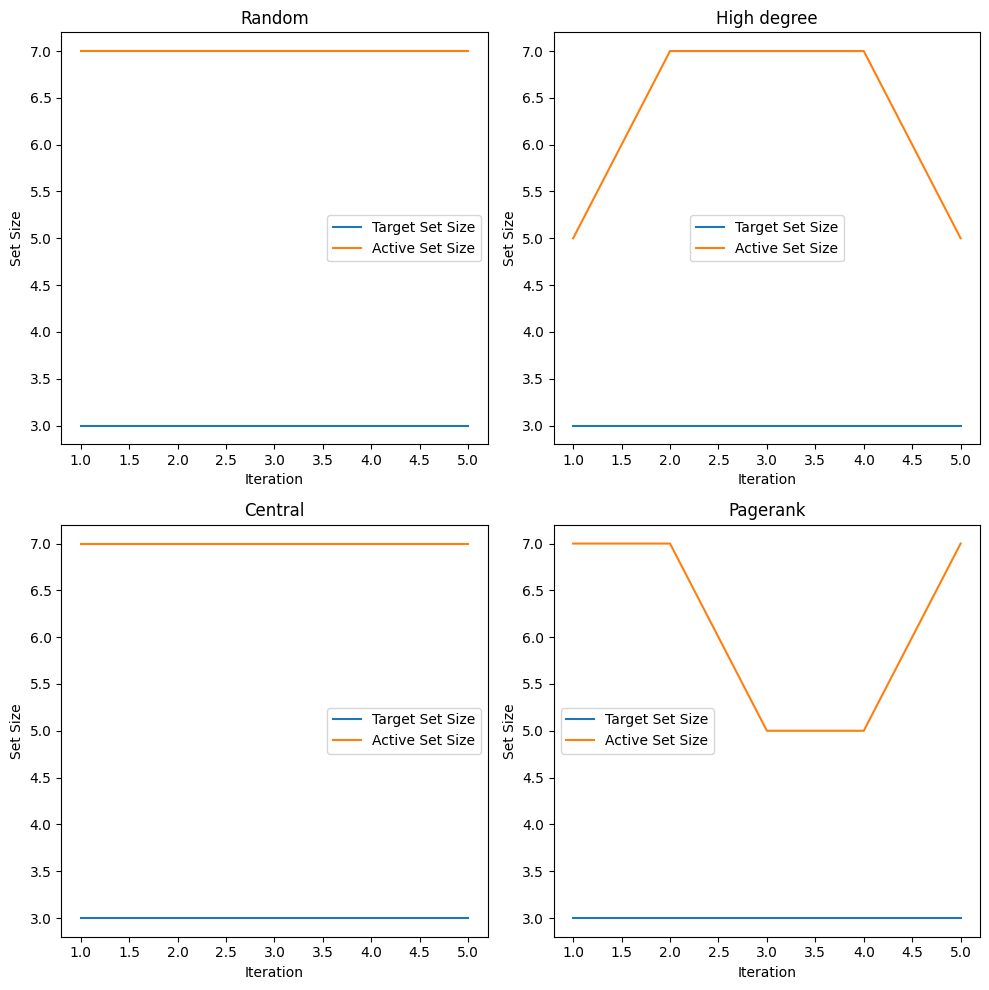

In [29]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def influence_maximization_pagerank(g_, k_, eta_, l_):

    def compute_spread(g_, seed_set):
        # Initialize set of activated nodes with seed set
        activated = set(seed_set)

        # Iterate until no new nodes are activated
        while True:
            new_activated = False
            for u in g_.nodes():
                # Skip nodes that are already activated
                if u in activated:
                    continue

                # Compute activation probability based on the number of activated neighbors
                num_active_neighbors = len([v for v in g_.neighbors(u) if v in activated])
                num_neighbors = len(list(g_.neighbors(u)))
                if num_neighbors == 0:
                    activation_prob = 0.0
                else:
                    activation_prob = num_active_neighbors / num_neighbors

                # Activate node with probability activation_prob
                if random.random() < activation_prob:
                    activated.add(u)
                    new_activated = True

            if not new_activated:
                break

        return len(activated)

    seed_set_ = set()  # Initialize empty seed set
    target_sizes_ = []  # Initialize list for target set sizes
    active_sizes_ = []  # Initialize list for active set sizes

    for _ in range(eta_):
        # Compute PageRank scores for each node
        pagerank_scores = nx.pagerank(g_)

        # Sort nodes by their PageRank scores in descending order
        sorted_nodes = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)

        # Add top-k nodes with the highest PageRank scores to seed set
        seed_set_ |= set(sorted_nodes[:k_])

        # Calculate target set size and active set size
        target_sizes_.append(len(seed_set_))
        active_sizes_.append(compute_spread(g_, seed_set_))

    return list(seed_set_), target_sizes_, active_sizes_


# Define graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)])

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

modes = ['random', 'high degree', 'central', 'pagerank']

# Iterate over modes and plot graphs
for i, mode in enumerate(modes):
    # Select subplot
    ax = axs[i // 2, i % 2]

    # Perform influence maximization
    seed_nodes, target_sizes, active_sizes = influence_maximization_pagerank(G, k_=3, eta_=5, l_=10)

    # Plot target set size
    ax.plot(range(1, len(target_sizes) + 1), target_sizes, label='Target Set Size')

    # Plot active set size
    ax.plot(range(1, len(active_sizes) + 1), active_sizes, label='Active Set Size')

    # Set title and labels
    ax.set_title(mode.capitalize())
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Set Size')

    # Add legend
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
